In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import datetime

import matplotlib.pyplot as plt

from tqdm import tqdm

import feather

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import xgboost as xgb

import keras
from keras.preprocessing import sequence
from keras import layers, Input, Model
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Lambda

from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

from math import radians, degrees

Using TensorFlow backend.


In [2]:
# # Load in the time_series from the previous stage in the pipeline
# correlations = feather.read_dataframe("../data_files/B/once/75days/5mins/best_correlations_5mins_code_hour_day.feather")
# correlations = correlations.set_index(correlations.columns[0])


In [98]:
se = feather.read_dataframe("../data_files/B/once/75days/stop_events_with_geo_train_test_averages_prev_next_offsets.feather")
se = se.set_index(se.columns[0])

In [99]:
se.iloc[1978]

id                                          167_131_5
date                              2018-09-18 00:00:00
stopCode                                 1200BOB20164
aimedArrival                      2018-09-18 10:03:00
aimedDeparture                    2018-09-18 10:03:00
actualArrival                     2018-09-18 10:09:50
actualDeparture                   2018-09-18 10:10:30
vehicle                                           177
workid                                      167_131_5
patternId                                     167_107
publicName                                         1b
scheduledStart                                  36000
prev_stopCode                            1200BOB20162
prev_aimedArrival                 2018-09-18 10:02:00
prev_aimedDeparture               2018-09-18 10:02:00
prev_actualArrival                2018-09-18 10:09:03
prev_actualDeparture              2018-09-18 10:09:10
timingPoint                                         0
prev_timingPoint            

In [100]:
def filter_rare(stop_events):

    print("Calculating rare segments...")

    segment_counts = stop_events.groupby("segment_code").size()

    filtered_stop_events = stop_events.drop(
        stop_events[
            stop_events["segment_code"].isin(
                segment_counts[segment_counts < 120].index.values
            )
        ].index
    )

    print("\tCalculated")

    return filtered_stop_events

se = filter_rare(se)

Calculating rare segments...
	Calculated


In [6]:
# We need to generate this from scratch as we need both test and train data. 
# ts_5 = se.pivot_table(
#         index="arrival_5mins",
#         columns="segment_code",
#         values="diff_percent_segment_and_median_by_segment_code_and_hour_and_day",
#         aggfunc=np.median,
#     )

In [7]:
# ts_10 = se.pivot_table(
#         index="arrival_10mins",
#         columns="segment_code",
#         values="diff_percent_full_segment_and_median_by_segment_code_and_hour_and_day",
#         aggfunc=np.median,
#     )

In [8]:
# ts_interp_5 = ts_5.interpolate(method='time', axis=0)
# ts_interp_10 = ts_10.interpolate(method='time', axis=0)

In [9]:
# weather = pd.read_csv("../weather/CDO9610867945337_weather.csv")


# weather['date'] = pd.to_datetime(weather[' YEARMODA'], format="%Y%m%d")
# weather['rain'] = weather['PRCP  '].apply(lambda x: float(x[:-1]))

# just_rain = weather[['date', 'rain']]

# se = se.merge(just_rain, left_on="date", right_on="date", how='left')

In [10]:
# se["diff_segment_and_median_by_segment_code"] = (
#     se["segment_duration"]
#     - se["median_durations_by_segment_code"]
# )
# se["diff_segment_and_median_by_segment_code_and_hour_and_day"] = (
#     se["segment_duration"]
#     - se["median_durations_by_segment_code_and_hour_and_day"]
# )

# se["diff_percent_segment_and_median_by_segment_code"] = (
#     se["diff_segment_and_median_by_segment_code"]
#     * 100
#     / se["median_durations_by_segment_code"]
# )

# se["diff_percent_segment_and_median_by_segment_code_and_hour_and_day"] = (
#     se["diff_segment_and_median_by_segment_code_and_hour_and_day"]
#     * 100
#     / se["median_durations_by_segment_code_and_hour_and_day"]
# )

In [11]:
# os.system("say -v Fiona Add in previous bus stop and use thats 5mins and 10mins time series, it will be different depending on pattern") 

In [12]:
# se = se[['date', 'stopCode', 'aimedArrival', 'aimedDeparture', 'actualArrival', 
#        'actualDeparture', 'prev_stopCode', 'prev_aimedArrival',
#        'prev_aimedDeparture', 'prev_actualArrival', 'prev_actualDeparture',
#        'timingPoint', 'prev_timingPoint', 'arrival_hour', 'segment_code', 
#        'segment_name', 'line_distance', 'to_centre_dist', 
#        'direction_degrees', 'train', 'test','full_duration','median_durations_by_segment_code',
#        'median_durations_by_segment_code_and_hour',
#        'median_durations_by_segment_code_and_hour_and_day',
#        'diff_segment_and_median_by_segment_code',
#        'diff_segment_and_median_by_segment_code_and_hour_and_day',
#        'diff_percent_segment_and_median_by_segment_code',
#        'diff_percent_segment_and_median_by_segment_code_and_hour_and_day',
#        'offset_timestamp_5_1','offset_timestamp_5_2','offset_timestamp_5_3', 
#        'offset_timestamp_10_1', 'offset_timestamp_10_2', 'offset_timestamp_10_3', 
#        'arrival_5mins', 
#        'arrival_10mins', 'rain', 'clock_direction_degrees']]


In [13]:
# se = se.merge(correlations['0'].to_frame(), left_on="segment_code", right_index=True, how="left")

In [14]:
# def best(row):
#     try:
#         value = time_series_interp.loc[row[0],row[1]] 
#     except: 
# #         print("--------------")
# #         print(row.name)
# #         print(row[0])
# #         print(row[1])
#         value = np.nan
#     return value

In [15]:

# segment_names = ['0', 'segment_code']
# column_names = ['best_offset', 'self_offset']

# for i in range(1,5):
#     segment_names.append(f"prev_segment_code_{i}")
#     segment_names.append(f"next_segment_code_{i}")
#     column_names.append(f"prev_stop_{i}_offset")
#     column_names.append(f"next_stop_{i}_offset")
    

# # stop_events['best_0_5_1'] = stop_events[['offset_timestamp_5_1', '0']].apply(best, axis=1)
# # stop_events['best_0_5_2'] = stop_events[['offset_timestamp_5_2', '0']].apply(best, axis=1)
# # stop_events['best_0_5_3'] = stop_events[['offset_timestamp_5_3', '0']].apply(best, axis=1)
# # stop_events['best_0_5_4'] = stop_events[['offset_timestamp_5_4', '0']].apply(best, axis=1)
# # stop_events['self_offset_5_1'] = stop_events[['offset_timestamp_5_1', 'segment_code']].apply(best, axis=1)
# stop_events['self_offset_5_2'] = stop_events[['offset_timestamp_5_2', 'segment_code']].apply(best, axis=1)
# stop_events['self_offset_5_3'] = stop_events[['offset_timestamp_5_3', 'segment_code']].apply(best, axis=1)
# stop_events['self_offset_5_4'] = stop_events[['offset_timestamp_5_4', 'segment_code']].apply(best, axis=1)


In [101]:
se.shape

(3918931, 133)

In [17]:
# for i in range(1,5):
#     for j in range(len(segment_names)):
#         stop_events[f"{column_names[j]}_5_{i}"] = stop_events[[f"offset_timestamp_5_{i}", segment_names[j]]].apply(best, axis=1)
    

In [110]:
se.isna().sum().sort_values(ascending=False)[:50]

prev_stop_4_offset_5_4                            412553
prev_stop_4_offset_5_3                            411845
prev_stop_4_offset_5_2                            411267
prev_stop_4_offset_5_1                            410180
next_stop_4_offset_5_4                            373066
next_stop_4_offset_5_3                            372125
next_stop_4_offset_5_2                            371471
next_stop_4_offset_5_1                            370839
prev_stop_3_offset_5_4                            314341
prev_stop_3_offset_5_3                            313572
prev_stop_3_offset_5_2                            313007
prev_stop_3_offset_5_1                            311955
next_stop_3_offset_5_4                            281725
next_stop_3_offset_5_3                            280774
next_stop_3_offset_5_2                            280125
next_stop_3_offset_5_1                            279497
prev_stop_2_offset_5_4                            214273
prev_stop_2_offset_5_3         

In [104]:
se = se.drop(labels=['0', 'best_offset_5_4', 'best_offset_5_3',
                           'best_offset_5_2','best_offset_5_1', 'test', 
                           'train', 'direction', 'midpoint_lon', 
                           'midpoint_lat', 'publicName', 'stopCode',
                           'vehicle', 'workid', 'patternId', 'prev_timingPoint',
                          'prev_stopCode', 'segment_code', 'segment_name',
                          'prev_segment_code_5', 'prev_segment_code_4',
                          'prev_segment_code_3', 'prev_segment_code_2',
                          'prev_segment_code_1', 'next_segment_code_5',
                          'next_segment_code_4', 'next_segment_code_3',
                          'next_segment_code_2', 'next_segment_code_1',
                          'prev_event_index_5', 'prev_event_index_4',
                          'prev_event_index_3', 'prev_event_index_2',
                          'prev_event_index_1', 'next_event_index_5',
                          'next_event_index_4', 'next_event_index_3',
                          'next_event_index_2', 'next_event_index_1', 'id'], axis=1)

In [105]:
se = se.drop(labels=['aimedArrival', 'aimedDeparture', 'actualArrival',
        'actualDeparture', 'prev_aimedArrival', 'prev_aimedDeparture',
        'prev_actualArrival', 'prev_actualDeparture', 'arrival_5mins',
        'offset_timestamp_5_1', 'offset_timestamp_5_2', 'offset_timestamp_5_3',
        'offset_timestamp_5_4'], axis=1)

In [106]:
se = se.drop(labels=['diff_percent_segment_and_median_by_segment_code', 
                                 'dwell_duration_dest', 'dwell_duration_prev',
                                'full_duration', 'diff_full_segment_and_median_by_segment_code',
        'diff_full_segment_and_median_by_segment_code_and_hour_and_day',
        'diff_percent_full_segment_and_median_by_segment_code',
        'diff_percent_full_segment_and_median_by_segment_code_and_hour_and_day', 'diff_segment_and_median_by_segment_code',
        'diff_segment_and_median_by_segment_code_and_hour_and_day',
        'diff_percent_segment_and_median_by_segment_code'], axis=1)

In [107]:
se = pd.get_dummies(se, columns=['arrival_hour','arrival_day'])

In [108]:
se = se.dropna(subset=['diff_percent_segment_and_median_by_segment_code_and_hour_and_day'])

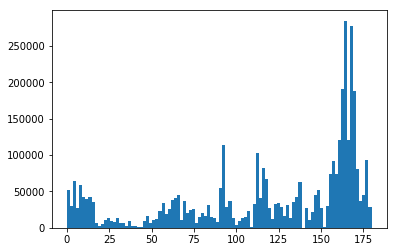

In [113]:
plt.hist(se['clock_direction_degrees'], bins=100);

In [114]:
se['clock_direction_degrees'] = se['clock_direction_degrees'].replace(np.nan, np.mean(se['clock_direction_degrees']))


In [115]:
se = se.replace(np.nan, 0)

In [116]:
to_remove = ['mean', 'prev_stop_', 'next_stop_', ]

min_cols = [c for c in se.columns if not any(x in c for x in to_remove)]

se_min = se[min_cols]

In [117]:
def split_train_test(events, days):

    first_day = events["date"].min()

#     days = 75

    train = events.loc[events["date"].isin(pd.date_range(first_day, periods=days))]

    test = events.loc[
        events["date"].isin(
            pd.date_range(first_day + pd.Timedelta(f"{days + 1} day"), periods=14)
        )]
    
    return train, test

In [118]:
train, test = split_train_test(se_min, 75)

In [119]:
# train_matrix = stop_events[stop_events['train']][['line_distance', 'to_centre_dist', 'direction_degrees', 'best_0', 'best_1', 'best_2', 'best_3', 'best_4', 'best_5', 'best_6', 'best_7', 'best_8', 'best_9', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39']].values
train_matrix = train.drop(["diff_percent_segment_and_median_by_segment_code_and_hour_and_day", 'date', 'segment_duration'], axis=1)
train_target = train["diff_percent_segment_and_median_by_segment_code_and_hour_and_day"]

# test_matrix = stop_events[stop_events['test']][['line_distance', 'to_centre_dist', 'direction_degrees', 'best_0', 'best_1', 'best_2', 'best_3', 'best_4', 'best_5', 'best_6', 'best_7', 'best_8', 'best_9', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39']].values
test_matrix = test.drop(["diff_percent_segment_and_median_by_segment_code_and_hour_and_day", "date", 'segment_duration'], axis=1)
test_target = test["diff_percent_segment_and_median_by_segment_code_and_hour_and_day"]

In [120]:
# train_matrix.isin([np.nan, np.inf, -np.inf]).any(0).sort_values(ascending=False)

In [121]:
# train_target.isin([np.nan, np.inf, -np.inf]).any()

In [122]:
# test_matrix.isin([np.nan, np.inf, -np.inf]).any(0).sort_values(ascending=False)

In [123]:
# test_target.isin([np.nan, np.inf, -np.inf]).any()

In [124]:
print(train_target.min())
print(train_target.max())

print(test_target.min())
print(test_target.max())

-14925.0
inf
-3482.608695652174
10467.441860465116


In [125]:
train_target = np.nan_to_num(train_target)
test_target = np.nan_to_num(test_target)

In [126]:
train_target = np.clip(train_target, -1000, 10000)
test_target = np.clip(test_target, -1000, 10000)

In [127]:

print(train_matrix.shape)
print(train_target.shape)

(3257131, 52)
(3257131,)


In [128]:
se_min.columns

Index(['date', 'scheduledStart', 'timingPoint', 'line_distance',
       'to_centre_dist', 'direction_degrees', 'segment_duration',
       'timetable_segment_duration', 'median_durations_by_segment_code',
       'median_durations_by_segment_code_and_hour',
       'median_durations_by_segment_code_and_hour_and_day',
       'median_dwell_dest_durations_by_stop_code',
       'median_dwell_prev_durations_by_stop_code',
       'median_dwell_dest_by_stop_code_and_hour',
       'median_dwell_prev_by_stop_code_and_hour',
       'median_dwell_dest_by_stop_code_and_hour_and_day',
       'median_dwell_prev_by_stop_code_and_hour_and_day',
       'median_full_durations_by_segment_code',
       'median_full_durations_by_segment_code_and_hour',
       'median_full_durations_by_segment_code_and_hour_and_day',
       'clock_direction_degrees', 'rain',
       'diff_percent_segment_and_median_by_segment_code_and_hour_and_day',
       'self_offset_5_1', 'self_offset_5_2', 'self_offset_5_3',
       'self_of

In [129]:
reg = LinearRegression().fit(train_matrix, train_target)

reg_results = reg.predict(test_matrix)

In [130]:
reg.score(test_matrix, test_target)



0.16819064376854587

In [131]:
rmse_lr = np.sqrt(mean_squared_error(test_target, reg_results))
mae_lr = mean_absolute_error(test_target, reg_results)


In [132]:
print(rmse_lr)
print(mae_lr)


91.25130548613238
39.30237304982279


(array([ 2.,  2.,  3.,  1.,  2., 31.,  1.,  3.,  4.,  3.]),
 array([-42.5606705 , -34.98217437, -27.40367823, -19.8251821 ,
        -12.24668596,  -4.66818982,   2.91030631,  10.48880245,
         18.06729859,  25.64579472,  33.22429086]),
 <a list of 10 Patch objects>)

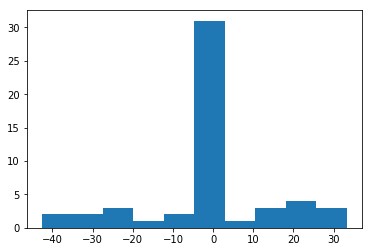

In [133]:
plt.hist(reg.coef_)

In [95]:
data_dmatrix = xgb.DMatrix(data=train_matrix,label=train_target)


In [134]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', eval_metric='mae', booster='gbtree', n_jobs=5, max_depth=5, n_estimators=20, verbosity=1)


In [135]:
xg_reg.fit(train_matrix, train_target)

xg_reg_results = xg_reg.predict(test_matrix)

In [136]:
rmse_xg = np.sqrt(mean_squared_error(test_target, xg_reg_results))
mae_xg = mean_absolute_error(test_target, xg_reg_results)

In [137]:
print(rmse_xg)
print(mae_xg)

85.59760009454625
36.727546686165674


In [54]:
rf_reg = RandomForestRegressor(max_depth=3, random_state=0, criterion='mae', n_jobs=5, n_estimators=10, verbose=2)

In [55]:
rf_reg.fit(train_matrix, train_target)

rf_reg_results = rf_reg.predict(test_matrix)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10


KeyboardInterrupt: 

In [ ]:
rmse_rf = np.sqrt(mean_squared_error(test_target, rf_reg_results))
mae_rf = mean_absolute_error(test_target, rf_reg_results)

In [ ]:
print(rmse_rf)
print(mae_rf)

In [142]:
test_matrix.columns[np.argsort(rf_reg.feature_importances_)[::-1]]

ZeroDivisionError: division by zero

In [141]:
test_matrix.columns[np.argsort(xg_reg.feature_importances_)[::-1]]

Index(['median_full_durations_by_segment_code', 'self_offset_5_1',
       'median_durations_by_segment_code',
       'median_dwell_prev_durations_by_stop_code', 'self_offset_5_3',
       'timingPoint', 'median_dwell_dest_durations_by_stop_code',
       'median_dwell_prev_by_stop_code_and_hour',
       'median_durations_by_segment_code_and_hour_and_day',
       'median_dwell_prev_by_stop_code_and_hour_and_day', 'line_distance',
       'timetable_segment_duration', 'median_dwell_dest_by_stop_code_and_hour',
       'median_dwell_dest_by_stop_code_and_hour_and_day', 'self_offset_5_2',
       'direction_degrees', 'to_centre_dist', 'clock_direction_degrees',
       'median_full_durations_by_segment_code_and_hour_and_day',
       'median_durations_by_segment_code_and_hour', 'scheduledStart', 'rain',
       'arrival_hour_0', 'median_full_durations_by_segment_code_and_hour',
       'self_offset_5_4', 'arrival_hour_13', 'arrival_day_6', 'arrival_day_5',
       'arrival_hour_18', 'arrival_day_4',

In [146]:
scaler_matrix = preprocessing.StandardScaler().fit(train_matrix)

train_matrix_scaled = scaler_matrix.transform(train_matrix)
test_matrix_scaled = scaler_matrix.transform(test_matrix)

scaler_target = preprocessing.StandardScaler().fit(train_target[:,None])

train_target_scaled = scaler_target.transform(train_target[:,None])
test_target_scaled = scaler_target.transform(test_target[:,None])




/Users/tommelamed/anaconda3/envs/busses/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tommelamed/anaconda3/envs/busses/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tommelamed/anaconda3/envs/busses/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [147]:
def create_fully_connected(input_width):
    model = Sequential()
    
    model.add(Dense(32, input_dim=input_width, activation='relu'))
    model.add(layers.Dropout(rate=0.2))
    model.add(Dense(12, activation='relu'))
    model.add(layers.Dropout(rate=0.2))
#     model.add(Dense(12, activation='relu'))
#     model.add(layers.Dropout(0.2))
    model.add(Dense(1, activation='tanh'))
    model.summary()
    
    return model

In [148]:
model = create_fully_connected(train_matrix.shape[1])

callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=2),
    keras.callbacks.ModelCheckpoint(filepath='full_conn_model.h5', monitor='val_loss', save_best_only=True)
]

model.compile(optimizer='rmsprop',
              loss='mean_absolute_error',
              metrics=['MAE'])
history = model.fit(train_matrix_scaled, train_target_scaled,
                    epochs=10,
                    callbacks=callbacks_list,
                    batch_size=512,
                    validation_data=(test_matrix_scaled, test_target_scaled))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1696      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                396       
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 2,105
Trainable params: 2,105
Non-trainable params: 0
___________________

In [149]:
model_to_load = 'full_conn_model.h5'

# Create the network and load the weights into it
model = create_fully_connected(test_matrix.shape[1])
model.load_weights(model_to_load)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
test_y_scaled = model.predict(test_matrix_scaled)

NN_results = scaler_target.inverse_transform(test_y_scaled)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                1696      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 12)                396       
_________________________________________________________________
dropout_4 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 13        
Total params: 2,105
Trainable params: 2,105
Non-trainable params: 0
_________________________________________________________________


In [150]:
rmse_NN = np.sqrt(mean_squared_error(test_target, NN_results))
mae_NN = mean_absolute_error(test_target, NN_results)


In [151]:
print(rmse_NN)
print(mae_NN)

96.06249632775497
33.27865368075231


In [ ]:
# rmse_best_0 = np.sqrt(mean_squared_error(test_target, stop_events[stop_events['test']]['best_0']))
# mae_best_0 = mean_absolute_error(test_target, stop_events[stop_events['test']]['best_0'])

In [ ]:
# print(rmse_best_0)
# print(mae_best_0)

In [ ]:
# plt.hist(NN_results, alpha=0.5, bins=100, label="NN", range=(-100, 100))
# plt.hist(xg_reg_results, bins=100, label="XGB", alpha=0.5,  range=(-100, 100))
# # plt.hist(reg_results, bins=100, label="Linear", alpha=0.5,  range=(-100, 100))
# plt.hist(stop_events[stop_events['test']]['best_0'], bins=100, alpha=0.5,  label="best_0", range=(-100, 100))
# # plt.hist(stop_events['diff_percent_full_segment_and_median_by_segment_code_and_hour_and_day'], bins=200, label="target", range=(-100, 100))
# # plt.hist(train_target, bins=200, label="train", range=(-100, 100))
# plt.hist(test_target, bins=100, label="target", alpha=0.5,  range=(-100, 100))
# # plt.yscale("log")
# plt.legend()

# plt.show()


In [143]:
def MAPE(forecast, actual):
    
    if(len(forecast) != len(actual)):
        raise ValueError('Could not calculate MAPE, forecast and actual arrays are different length')
        
    forecast = np.asarray(forecast)
    actual = np.asarray(actual)
    
    with np.errstate(divide='ignore', invalid='ignore'):
        
        division = (actual-forecast)/actual
        
        division[actual == 0] = 0
        
        # Instead of dividing by n we count by the number of non-zero values. 
        # Essentially ignoring all cases where the actual value is zero. 
        mape = 100 / np.count_nonzero(actual) * np.sum(np.abs(division))
    
    return mape

In [ ]:
predict_reg = test["median_durations_by_segment_code_and_hour_and_day"] * (1+(reg_results/100))

predict_xg = test["median_durations_by_segment_code_and_hour_and_day"] * (1+(xg_reg_results/100))

predict_NN = test["median_durations_by_segment_code_and_hour_and_day"] * (1+(NN_results/100))

# predict_best_0 = stop_events[stop_events['test']]["median_full_durations_by_segment_code_and_hour_and_day"] * (1+(stop_events[stop_events['test']]['best_0']/100))

predict_self_offset = test["median_durations_by_segment_code_and_hour_and_day"] * (1+(test['self_offset_5_1']/100))


In [ ]:
print(f"Linear MAPE: {MAPE(predict_reg, test['segment_duration'])}")
      
print(f"XGBoost MAPE: {MAPE(predict_xg, test['segment_duration'])}")
      
print(f"NN MAPE: {MAPE(predict_NN, stop_events[stop_events['test']]['full_duration'])}")
            
# print(f"Best_0 MAPE: {MAPE(predict_best_0, stop_events[stop_events['test']]['full_duration'])}")
      
print(f"self_offset MAPE: {MAPE(predict_self_offset, test['segment_duration'])}")

In [ ]:
# plt.hist(stop_events['30'], bins=100);

In [ ]:
# MAPE(stop_events[stop_events['test']]['median_full_durations_by_segment_code_and_hour_and_day'], stop_events[stop_events['test']]['full_duration'])


In [ ]:
os.system("say -v Fiona Go check your results - Kitchen Sink") 